In [42]:
library(tidyverse)
library(scales)
#library(ggrepel)
library(patchwork)

## [9.2.1 Exercises](https://r4ds.hadley.nz/layers#exercises)

1. Create a scatterplot of hwy vs. displ where the points are pink filled in triangles.

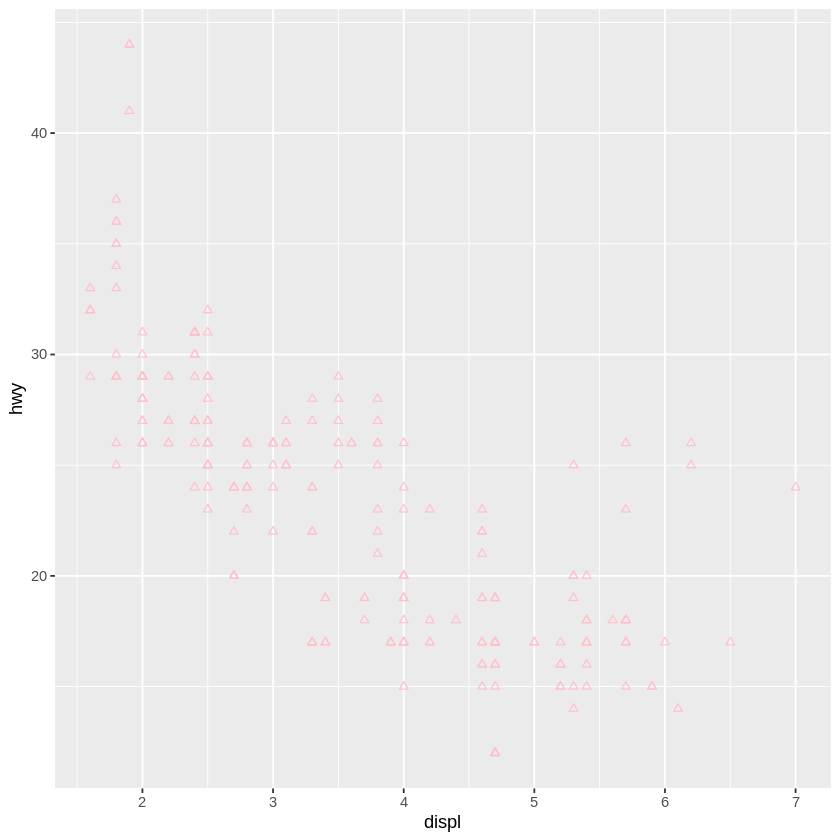

In [2]:
ggplot(mpg, aes(x = displ, y = hwy)) + 
  geom_point(color = "pink", shape = 2)

2. Why did the following code not result in a plot with blue points?
```r
ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy, color = "blue"))
```

Because the color argument is inside aes() and not it's own argument.

3. What does the stroke aesthetic do? What shapes does it work with? (Hint: use ?geom_point)

Stroke changes the thickness of the boarder of the shape. It appears to work with all shapes.

4. What happens if you map an aesthetic to something other than a variable name, like aes(color = displ < 5)? Note, you’ll also need to specify x and y.

It colors the points based on whether the statment is true of false.

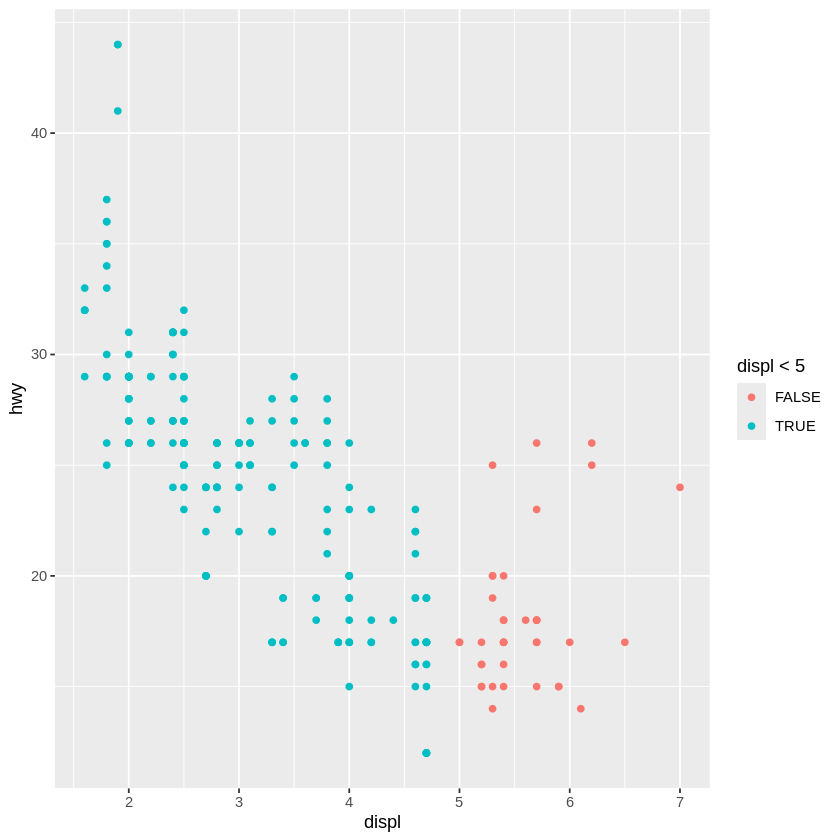

In [22]:
ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy, color = displ < 5))

## [9.3.1 Exercises](https://r4ds.hadley.nz/layers#exercises-1)

1. What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?

line chart - geom_smooth()  
boxplot - geom_boxplot()  
histogram - geom_histogram()  
area chart - geom_area()

2. Earlier in this chapter we used show.legend without explaining it:
```r
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_smooth(aes(color = drv), show.legend = FALSE)
```
What does show.legend = FALSE do here? What happens if you remove it? Why do you think we used it earlier?

show.legend = FALSE removes the legend from the graph. If you remove that argument the legend appears because the defualt is true. It was used earlier because we were looking at the differences in graphs and didn't particularly care about what each line meant at the moment.

3. What does the se argument to geom_smooth() do?

It dispalys the confidence interval.

4. Recreate the R code necessary to generate the following graphs. Note that wherever a categorical variable is used in the plot, it’s drv.

<img src="https://r4ds.hadley.nz/layers_files/figure-html/unnamed-chunk-19-1.png" width="300" height="200"/></img>
<img src="https://r4ds.hadley.nz/layers_files/figure-html/unnamed-chunk-19-2.png" width="300" height="200"/></img>

<img src="https://r4ds.hadley.nz/layers_files/figure-html/unnamed-chunk-19-3.png" width="300" height="200"/></img>
<img src="https://r4ds.hadley.nz/layers_files/figure-html/unnamed-chunk-19-4.png" width="300" height="200"/></img>

<img src="https://r4ds.hadley.nz/layers_files/figure-html/unnamed-chunk-19-5.png" width="300" height="200"/></img>
<img src="https://r4ds.hadley.nz/layers_files/figure-html/unnamed-chunk-19-6.png" width="300" height="200"/></img>

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in geom_smooth(aes(shape = drv), show.legend = FALSE):
“Ignoring unknown aesthetics: shape”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


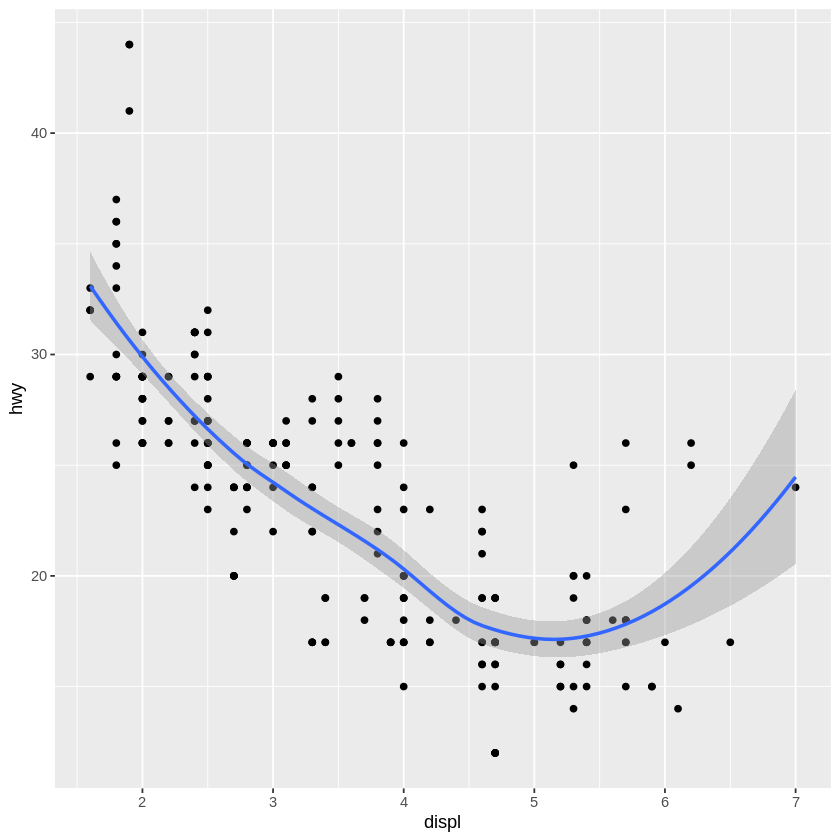

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


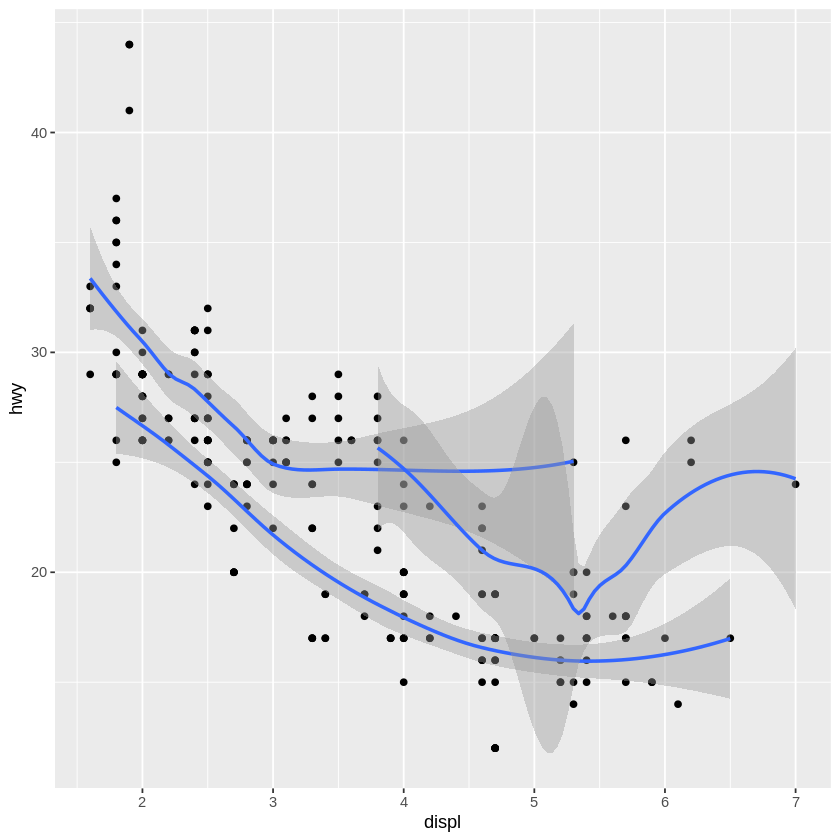

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


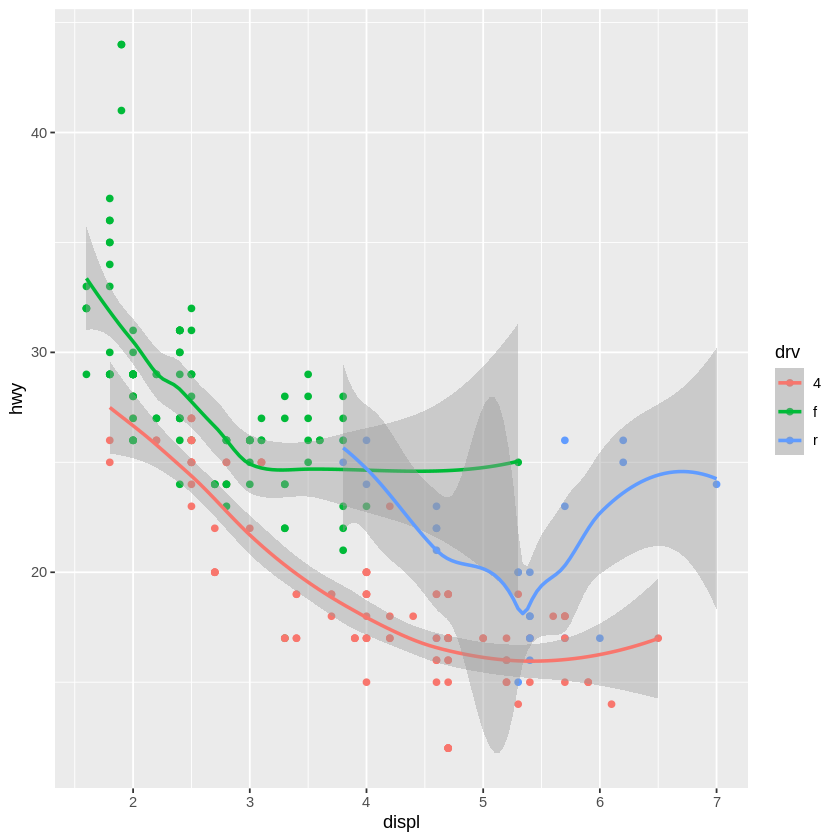

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


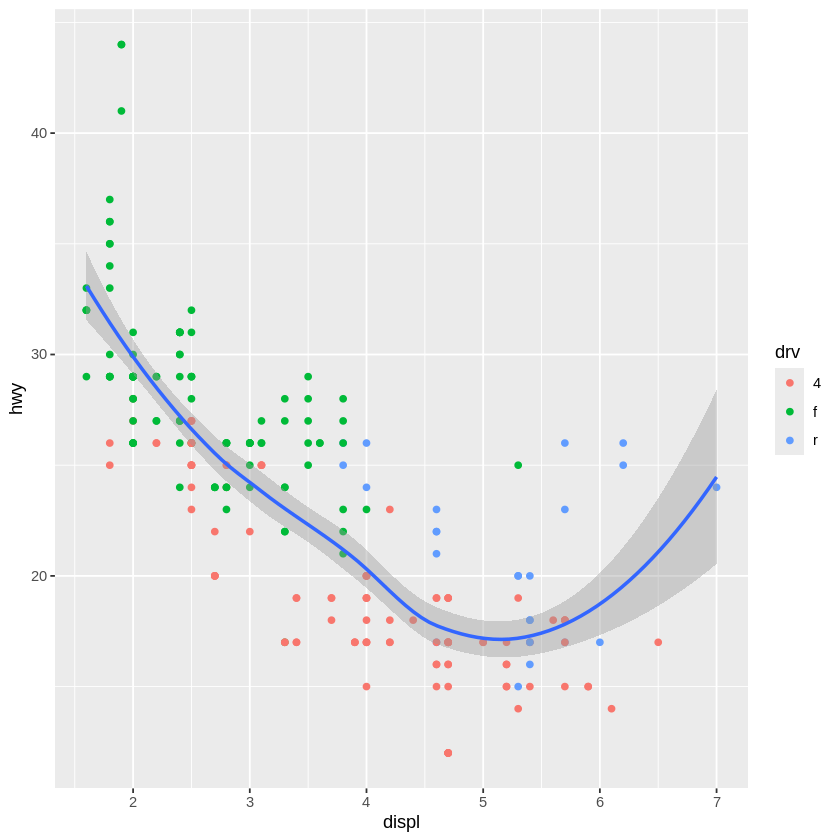

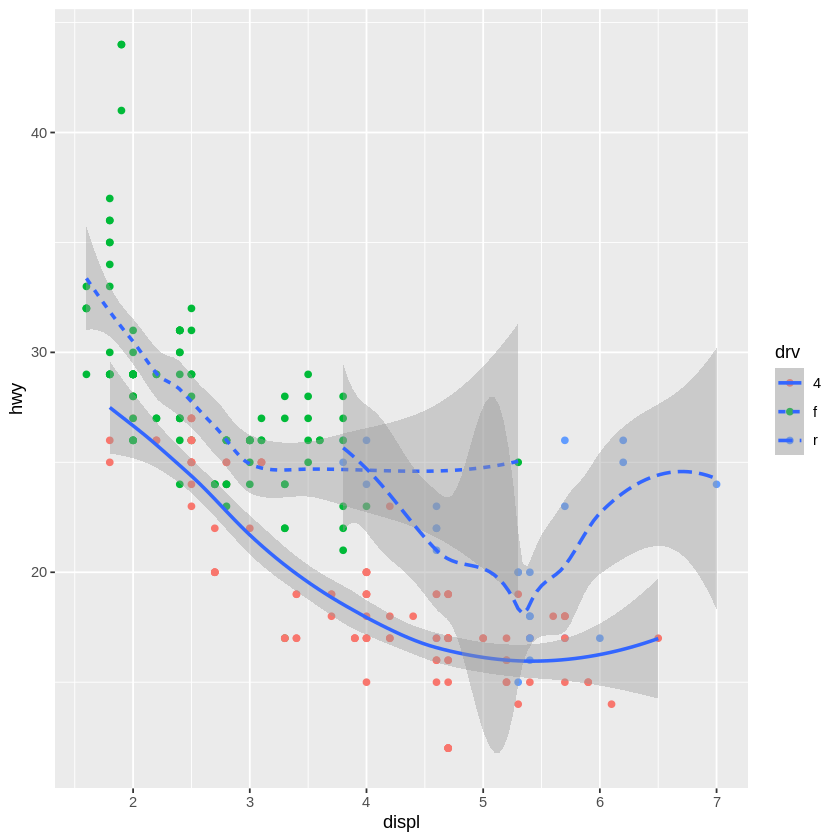

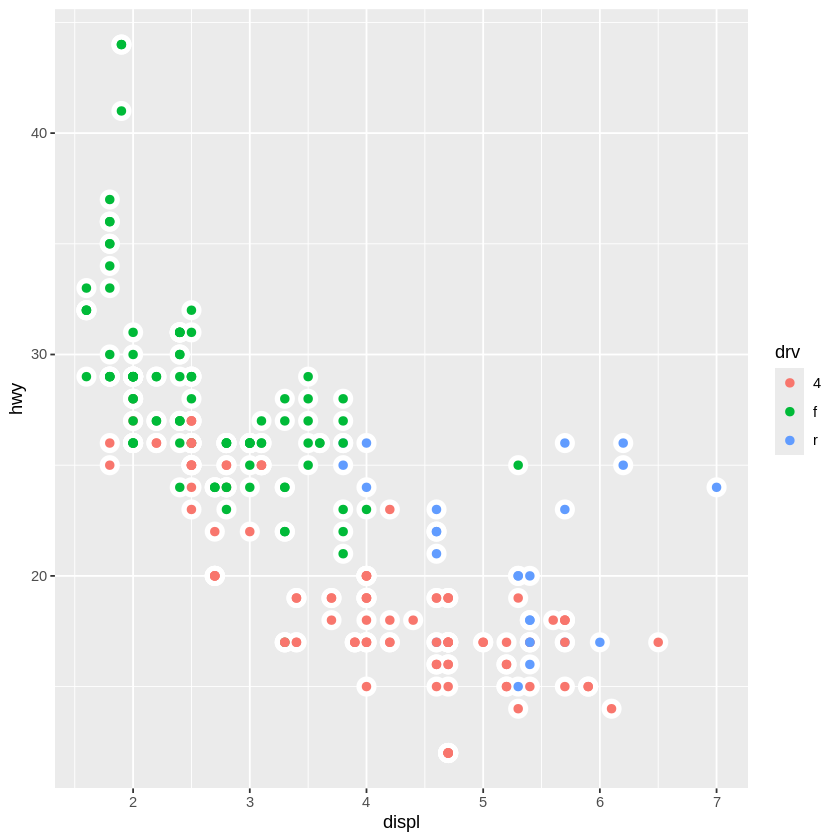

In [25]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    geom_smooth()

ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    geom_smooth(aes(shape = drv), show.legend = FALSE)

ggplot(mpg, aes(x = displ, y = hwy, color = drv)) +
    geom_point() +
    geom_smooth()

ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point(aes(color = drv)) +
    geom_smooth()

ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point(aes(color = drv)) +
    geom_smooth(aes(linetype = drv))

ggplot(mpg, aes(x = displ, y = hwy, color = drv)) +
    geom_point(size = 5, color = "white") +
    geom_point(size = 2)

## [9.4.1 Exercises](https://r4ds.hadley.nz/layers#exercises-2)

1. What happens if you facet on a continuous variable?

It gives you a lot of plots.

2. What do the empty cells in the plot above with facet_grid(drv ~ cyl) mean? Run the following code. How do they relate to the resulting plot?
```r
ggplot(mpg) + 
  geom_point(aes(x = drv, y = cyl))
```

The empty cells mean that there are no observations that have both those values. For example, no car has 5 cyl with a drv of r. They relate to the plot because it colud be a possible combination, it just isn't.

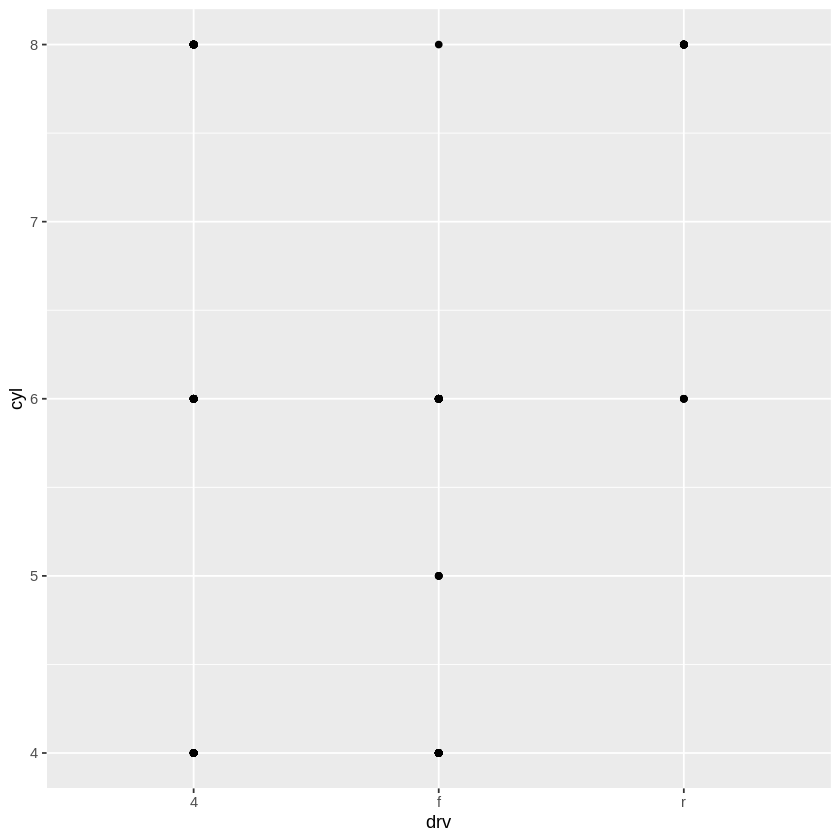

In [28]:
ggplot(mpg) + 
  geom_point(aes(x = drv, y = cyl))

3. What plots does the following code make? What does . do?
```r
ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .)

ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy)) +
  facet_grid(. ~ cyl)
```

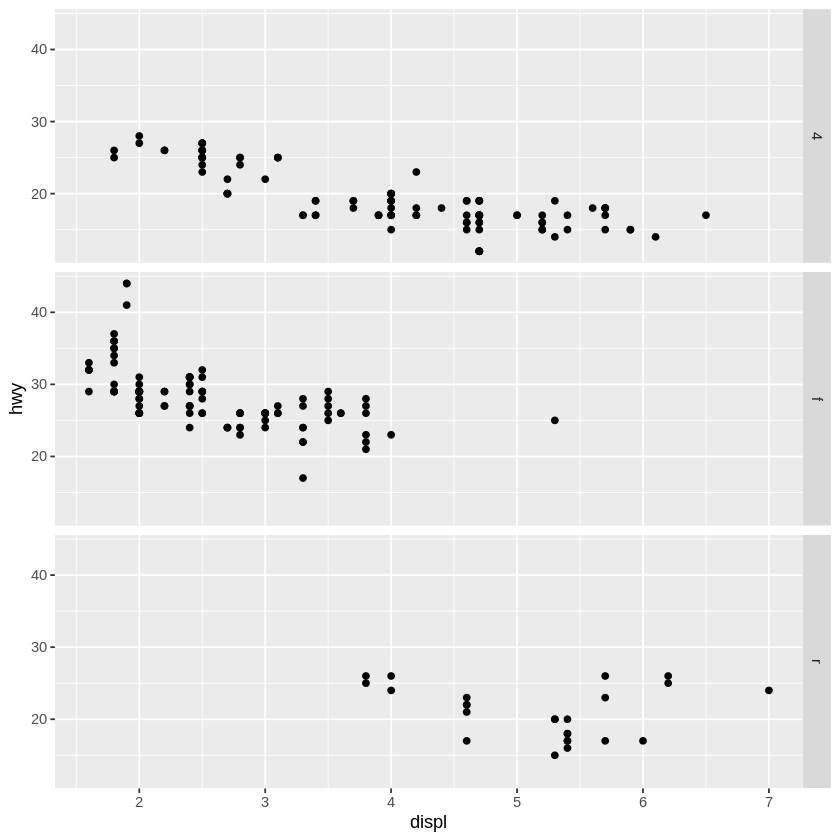

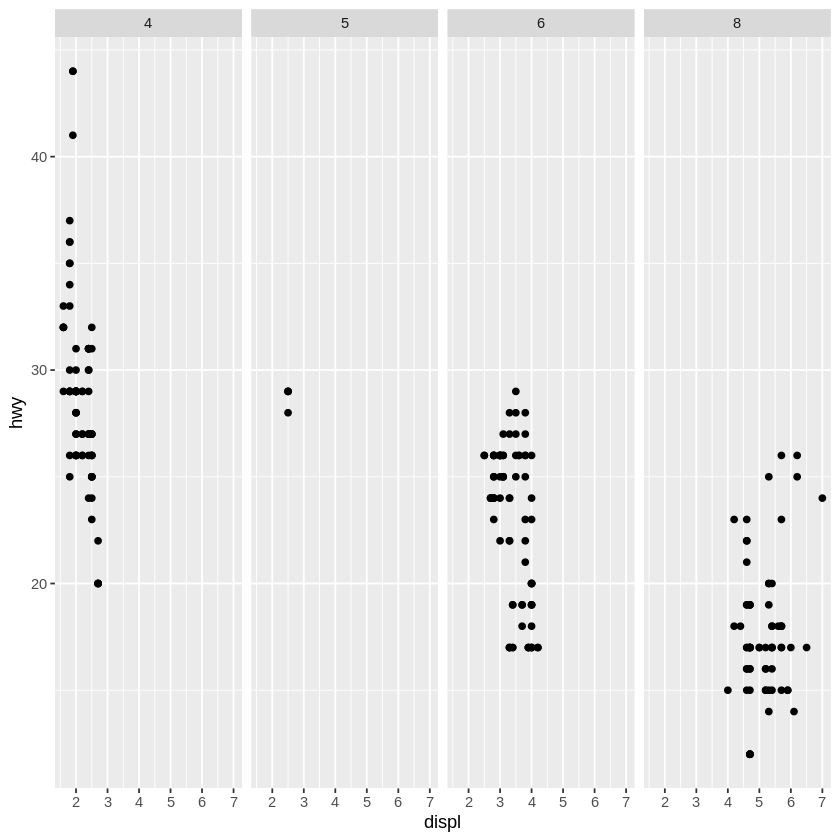

In [29]:
ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .)

ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy)) +
  facet_grid(. ~ cyl)

The code both made scatterplots of hwy vs displ, but the first one has rows for drv and the second has columns for cyl. The . is like a placeholder telling it to do nothing, but the code won't give you an error. The . is how both plots can use facet_grid, but only use one axis. 

4. Take the first faceted plot in this section:
```r
ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy)) + 
  facet_wrap(~ cyl, nrow = 2)
```
What are the advantages to using faceting instead of the color aesthetic? What are the disadvantages? How might the balance change if you had a larger dataset?

The advantages of faceting allows you to see each value of cyl separatly, which can help declutter the graph. The disatvantage is that it makes the cars harder to compare. As you increase the size of the dataset, faceting would be better since you wont have all the observations overcrowding one plot.

5. Read ?facet_wrap. What does nrow do? What does ncol do? What other options control the layout of the individual panels? Why doesn’t facet_grid() have nrow and ncol arguments?

nrow and ncol determine the number of rows or columns the graphs should be in. the dir argument changes whether the graphs are arranged horizonatlly or vertically. facet_grid() doesn't use nrow or ncol because those are determined by the number or values for the two variables.

6. Which of the following plots makes it easier to compare engine size (displ) across cars with different drive trains? What does this say about when to place a faceting variable across rows or columns?
```r
ggplot(mpg, aes(x = displ)) + 
  geom_histogram() + 
  facet_grid(drv ~ .)

ggplot(mpg, aes(x = displ)) + 
  geom_histogram() +
  facet_grid(. ~ drv)
```

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


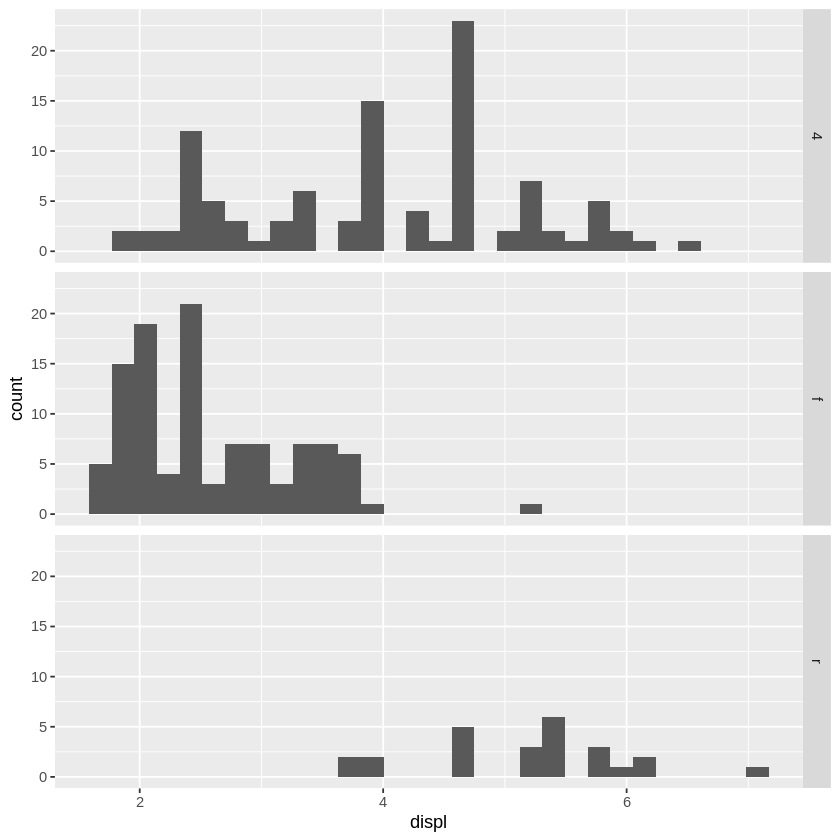

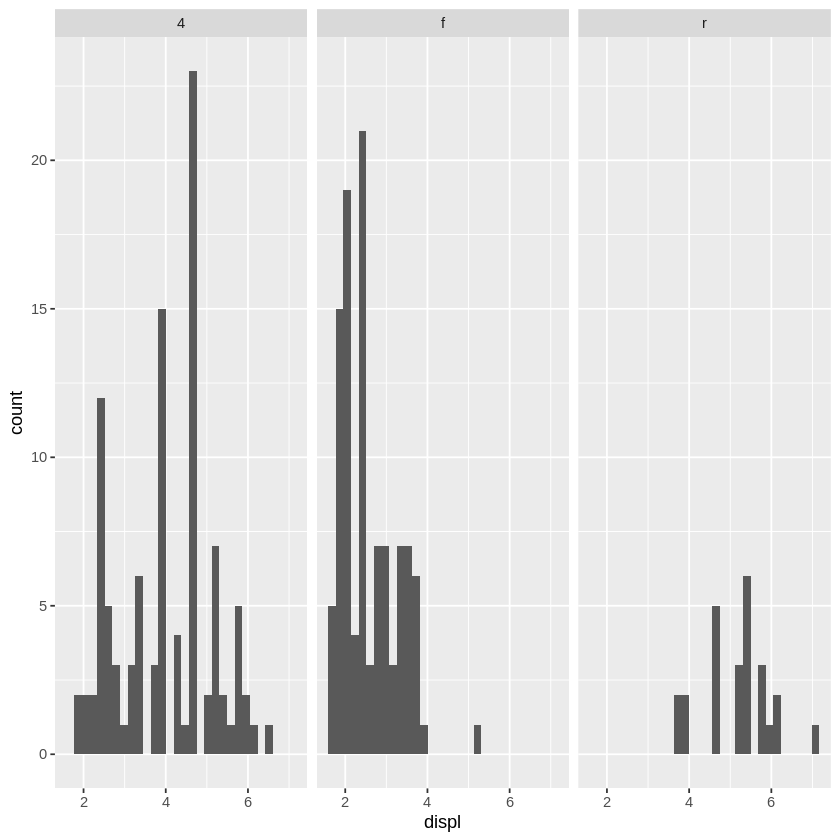

In [2]:
ggplot(mpg, aes(x = displ)) + 
  geom_histogram() + 
  facet_grid(drv ~ .)

ggplot(mpg, aes(x = displ)) + 
  geom_histogram() +
  facet_grid(. ~ drv)

The first graph looks much better and is easier to compare. The faceting variable should be on the same axis as the variable you want to compare. For example, since displ is on the x-axis, you should facet_wrap horizontally.

7. Recreate the following plot using facet_wrap() instead of facet_grid(). How do the positions of the facet labels change?
```r
ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .)
```

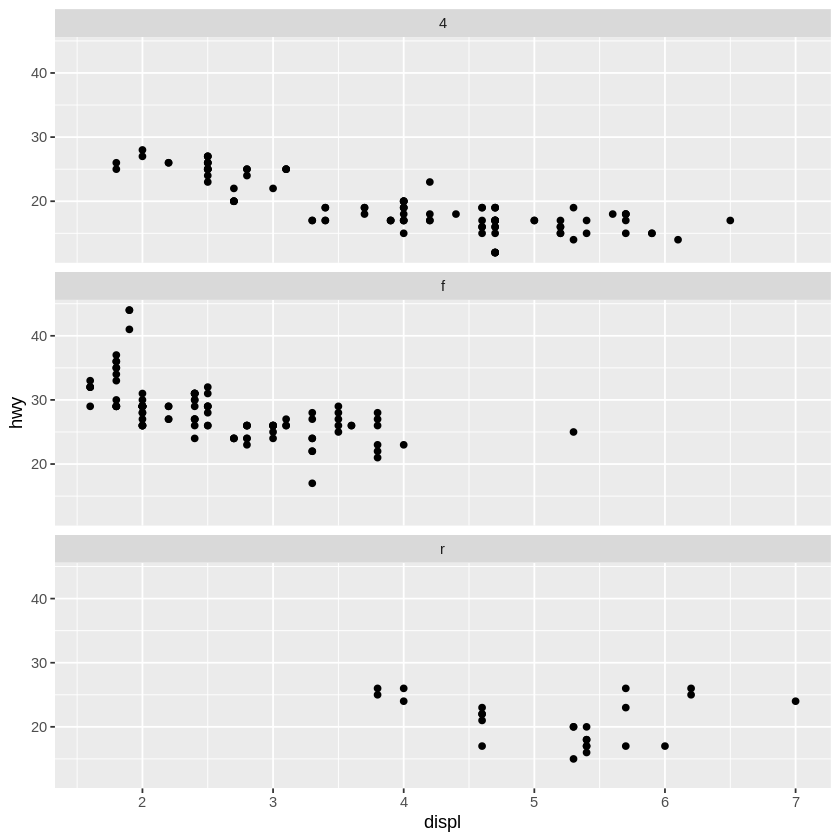

In [5]:
ggplot(mpg) + 
  geom_point(aes(x = displ, y = hwy)) +
  facet_wrap(~ drv, nrow = 3)

The labels are above the graph instead of to the right of it.

## [9.5.1 Exercises](https://r4ds.hadley.nz/layers#exercises-3)

1. What is the default geom associated with stat_summary()? How could you rewrite the previous plot to use that geom function instead of the stat function?

geom_pointrange(). 

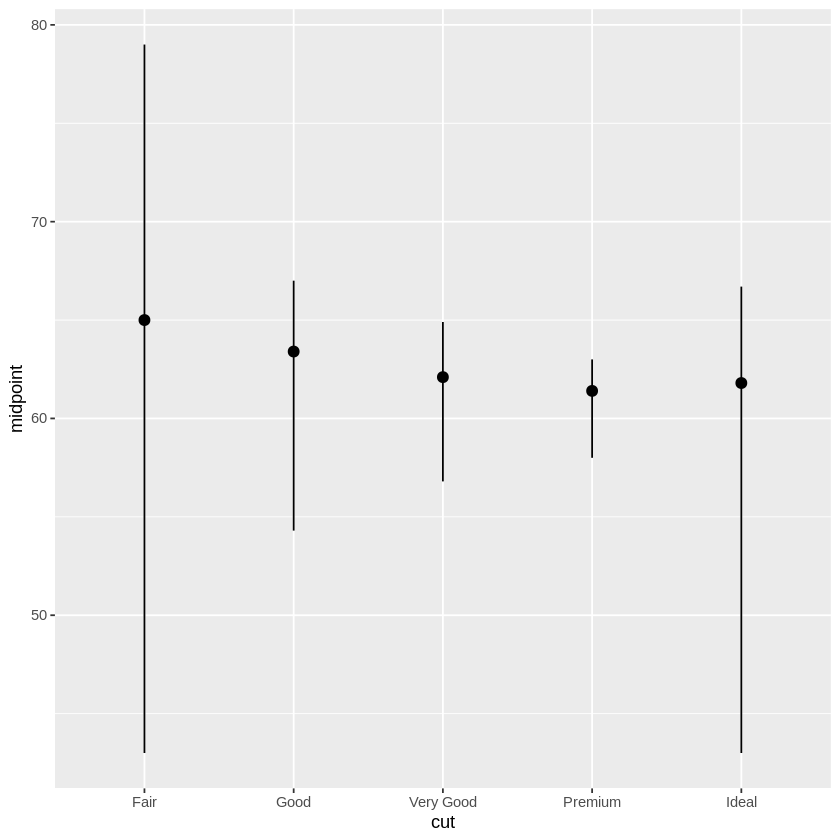

In [9]:
diamonds |>
  group_by(cut) |>
  summarize(lower = min(depth), upper = max(depth), midpoint = median(depth)) |>
  ggplot(aes(x = cut, y = midpoint)) +
  geom_pointrange(aes(ymin = lower, ymax = upper))

2. What does geom_col() do? How is it different from geom_bar()?

geom_col() plots heights already in the data while geom_bar() uses a calculation to get the heights.

3. Most geoms and stats come in pairs that are almost always used in concert. Make a list of all the pairs. What do they have in common? (Hint: Read through the documentation.)

geom_bar() - stat_count()  
geom_bin2d() - stat_bin_2d()  
geom_boxplot() - stat_boxplot()  
geom_contour_filled() - stat_contour_filled()  
geom_contour() - stat_contour()  
geom_count() - stat_sum()  
geom_density_2d() - stat_density_2d()  
geom_density() - stat_density()  
geom_dotplot() - stat_bindot()  
geom_function() - stat_function()  
geom_sf() - stat_sf()  
geom_sf() - stat_sf()  
geom_smooth() - stat_smooth()  
geom_violin() - stat_ydensity()  
geom_hex() - stat_bin_hex()  
geom_qq_line() - stat_qq_line()  
geom_qq() - stat_qq()  
geom_quantile() - stat_quantile()
  
  
A lot of them have the same name, just substitute stat for geom.

4. What variables does stat_smooth() compute? What arguments control its behavior?

after_stat(y) or after_stat(x) compute the predicted value  
after_stat(ymin) or after_stat(xmin) compute lower pointwise confidence interval around the mean  
after_stat(ymax) or after_stat(xmax) compute upper pointwise confidence interval around the mean  
after_stat(se) computes standard error

5. In our proportion bar chart, we needed to set group = 1. Why? In other words, what is the problem with these two graphs?
```r
ggplot(diamonds, aes(x = cut, y = after_stat(prop))) + 
  geom_bar()
ggplot(diamonds, aes(x = cut, fill = color, y = after_stat(prop))) + 
  geom_bar()
```

Both graphs do not correctly show the proportions of each variable. Setting group = 1 fixes that issue.

## [9.6.1 Exercises](https://r4ds.hadley.nz/layers#exercises-4)

1. What is the problem with the following plot? How could you improve it?
```r
ggplot(mpg, aes(x = cty, y = hwy)) + 
  geom_point()
```

A lot of the points are overlapping due to rounding. Use geom_jitter() to show all points.

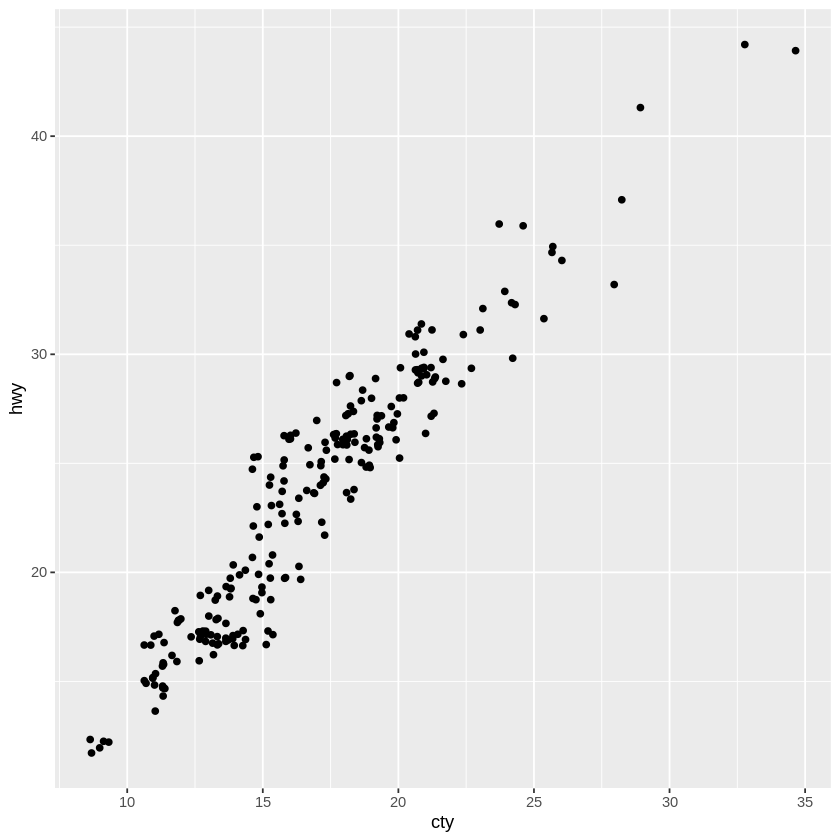

In [2]:
ggplot(mpg, aes(x = cty, y = hwy)) + 
  geom_jitter()

2. What, if anything, is the difference between the two plots? Why?
```r
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point()
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(position = "identity")
```

They are the same because the default for position in geom_point() is identity.

3. What parameters to geom_jitter() control the amount of jittering?

width and height control the amount of horizontal and vertical jitter.

4. Compare and contrast geom_jitter() with geom_count().

geom_jitter() adds random noise so that the points don't overlap each other while geom_count() displays the number of points at each location in the plot.

5. What’s the default position adjustment for geom_boxplot()? Create a visualization of the mpg dataset that demonstrates it.

The default position adjustment is dodge2.

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”
Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


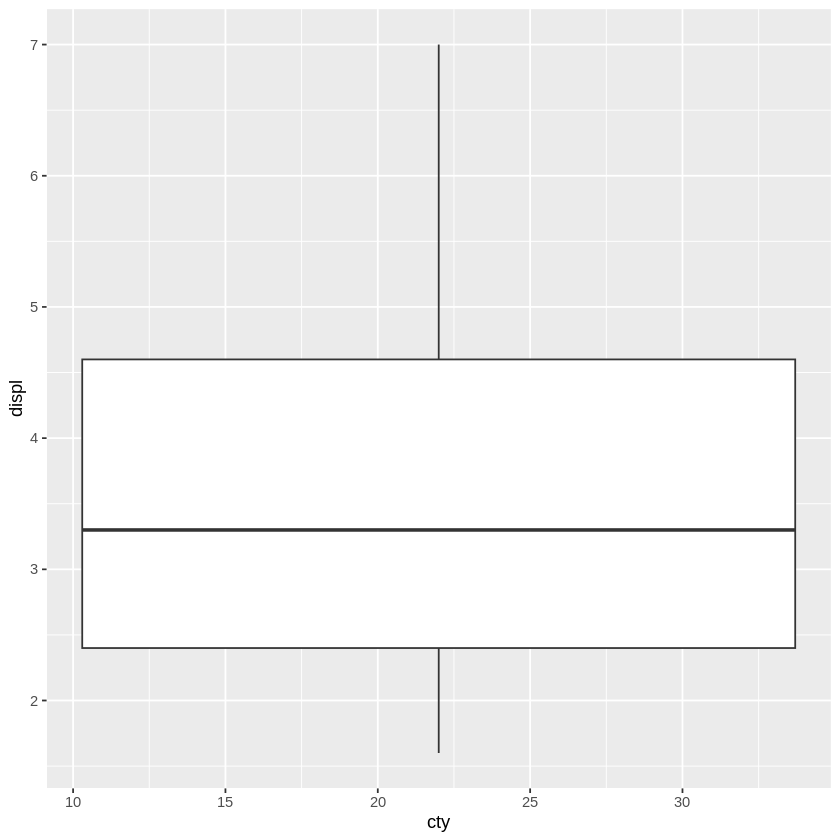

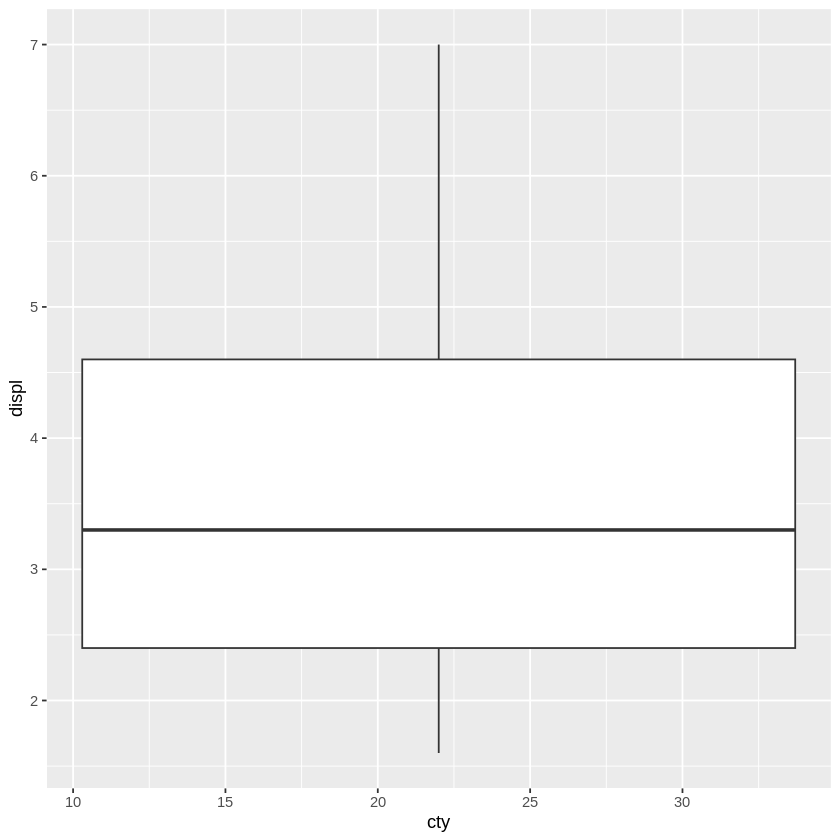

In [3]:
ggplot(mpg, aes(x = cty, y = displ)) +
    geom_boxplot()

ggplot(mpg, aes(x = cty, y = displ)) +
    geom_boxplot(position = "dodge2")

## [9.7.1 Exercises](https://r4ds.hadley.nz/layers#exercises-5)

1. Turn a stacked bar chart into a pie chart using coord_polar().

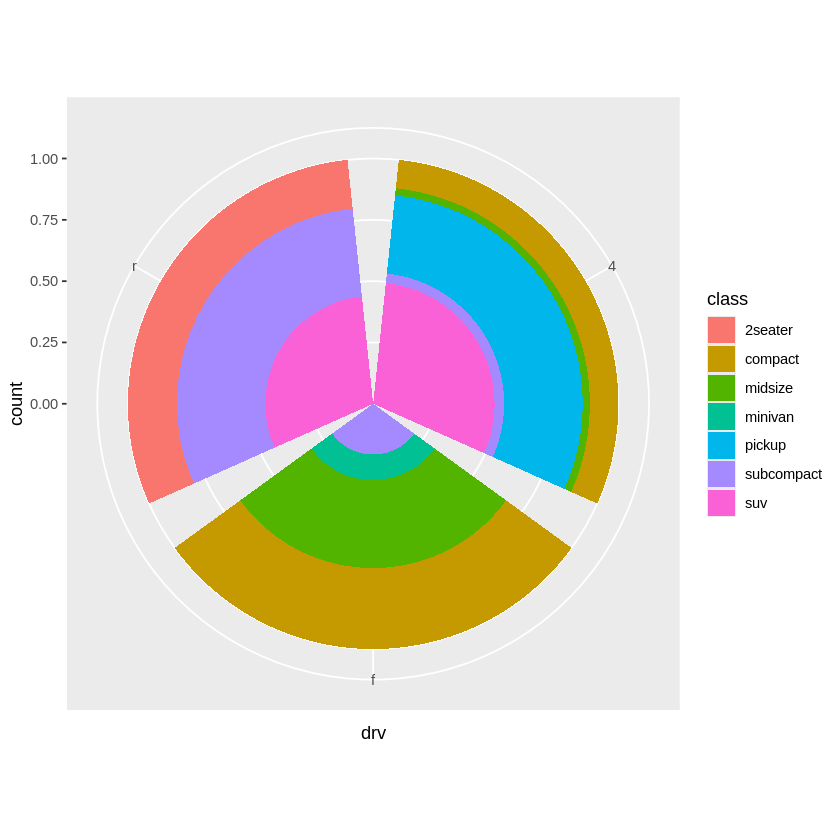

In [4]:
ggplot(mpg, aes(x = drv, fill = class)) + 
  geom_bar(position = "fill") +
  coord_polar()

2. What’s the difference between coord_quickmap() and coord_map()?

coord_map() creates a projection of a portion of earth while coord_quickmap() is an approximation of the projection.

3. What does the following plot tell you about the relationship between city and highway mpg? Why is coord_fixed() important? What does geom_abline() do?
```r
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() + 
  geom_abline() +
  coord_fixed()
```

Highway mileage iss always greater than city mileage. coord_fixed() forces a specified ratio. It ensures that one unit on the x-axis is the same length as one unit on the y-axis. geom_abline() adds a reference line at y = x.

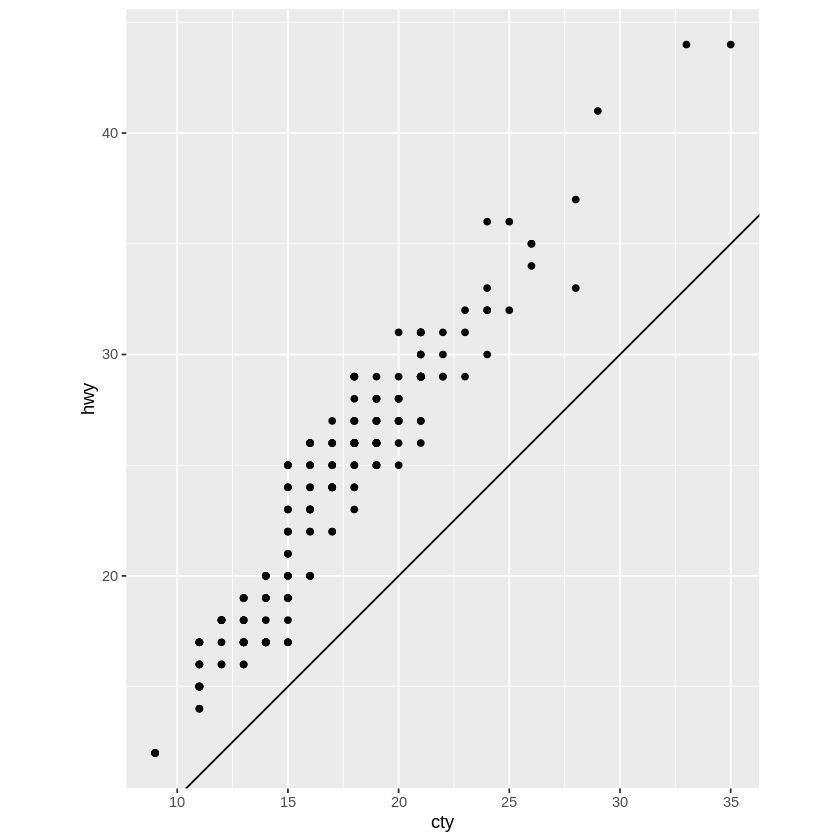

In [5]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() + 
  geom_abline() +
  coord_fixed()

## [10.3.3 Exercises](https://r4ds.hadley.nz/eda#exercises)

1. Explore the distribution of each of the x, y, and z variables in diamonds. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.

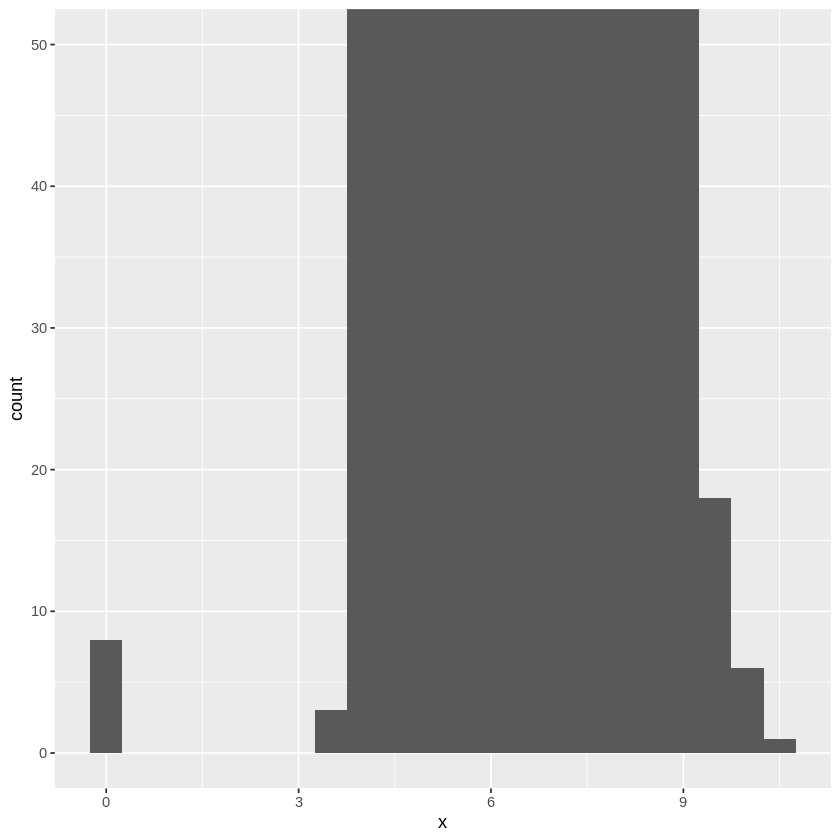

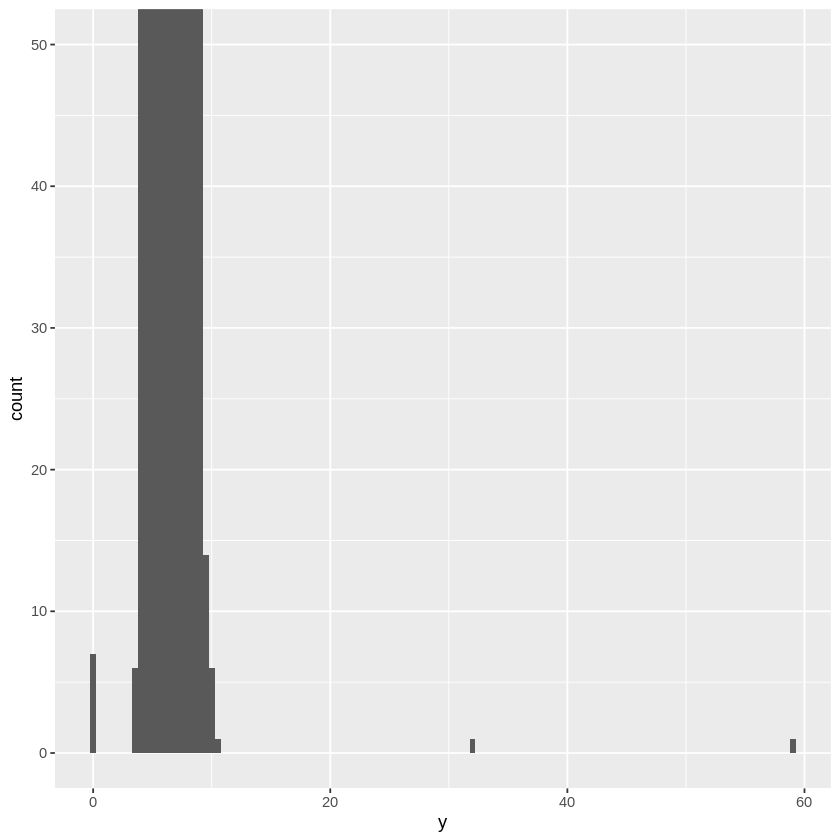

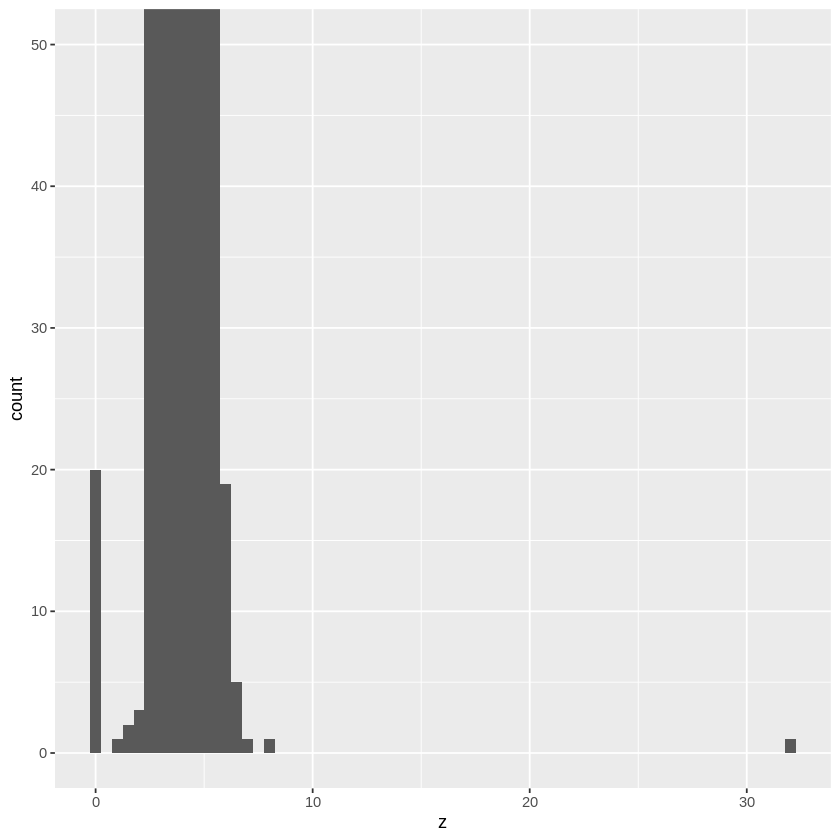

In [7]:
ggplot(diamonds, aes(x = x)) + 
  geom_histogram(binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

ggplot(diamonds, aes(x = y)) + 
  geom_histogram(binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

ggplot(diamonds, aes(x = z)) + 
  geom_histogram(binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

x only has a few outliers at 0, y has some at 0, ~30, and ~60, and z has outliers at 0 and ~30. x and y both have a similar distribution baring outliers, so they are probably length and width, with z being height.

2. Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the binwidth and make sure you try a wide range of values.)

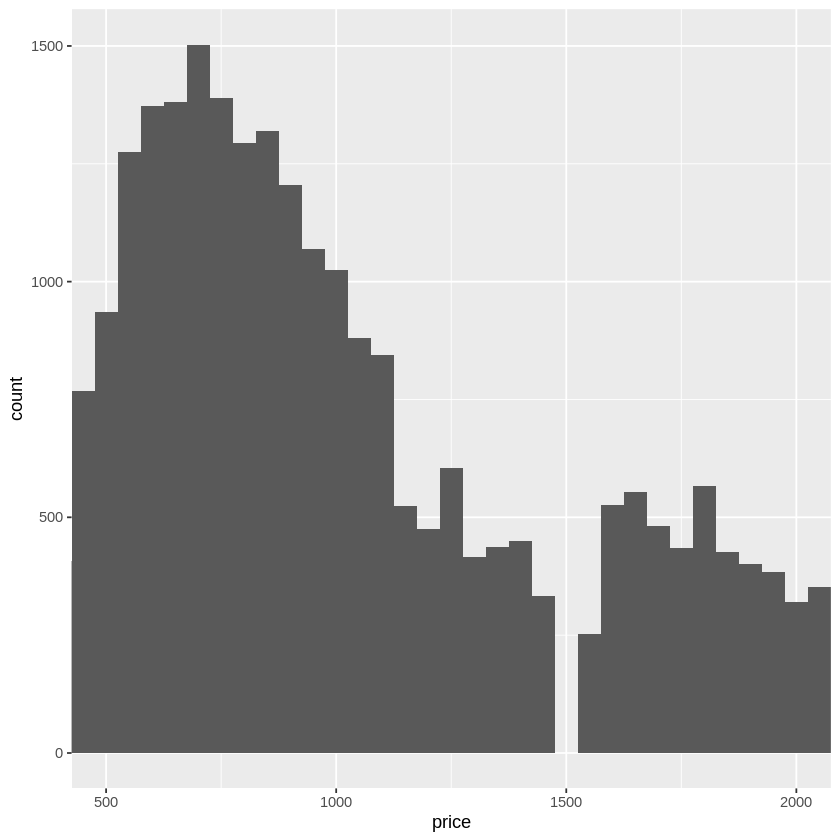

In [16]:
ggplot(diamonds, aes(x = price)) + 
  geom_histogram(binwidth = 50) +
  coord_cartesian(xlim = c(500, 2000))

There is a weird gap in the distribution at ~1500.

3. How many diamonds are 0.99 carat? How many are 1 carat? What do you think is the cause of the difference?

In [18]:
diamonds |>
    select(carat) |>
    filter(carat %in% c(0.99,1)) |>
    group_by(carat) |>
    count()

carat,n
<dbl>,<int>
0.99,23
1.00,1558


There are way more at 1 carat than 0.99 likely because of rounding.

4. Compare and contrast coord_cartesian() vs. xlim() or ylim() when zooming in on a histogram. What happens if you leave binwidth unset? What happens if you try and zoom so only half a bar shows?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 44232 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


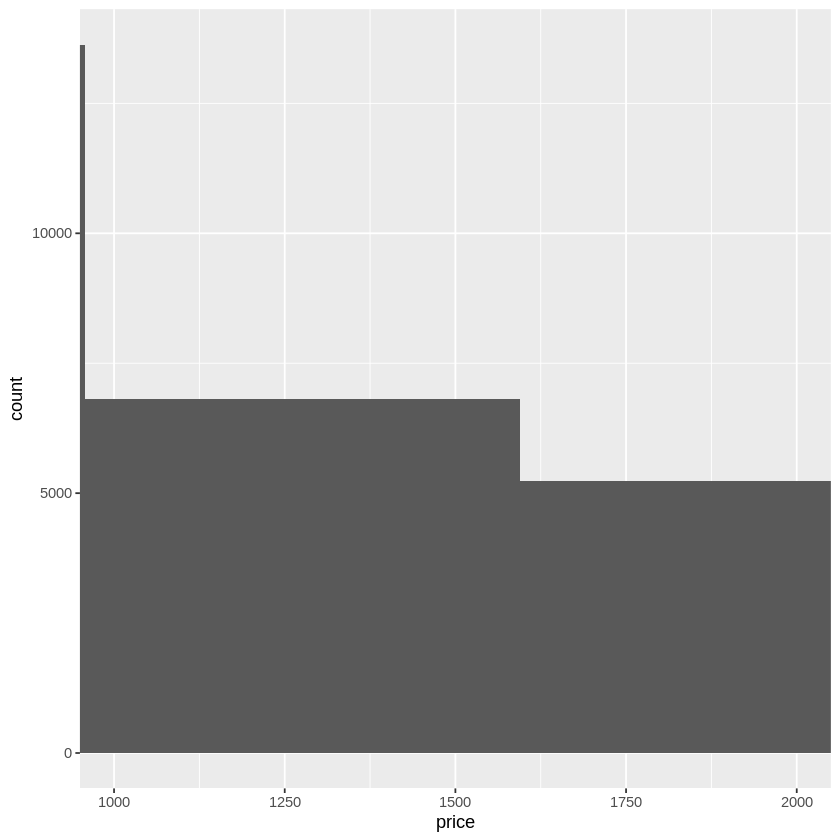

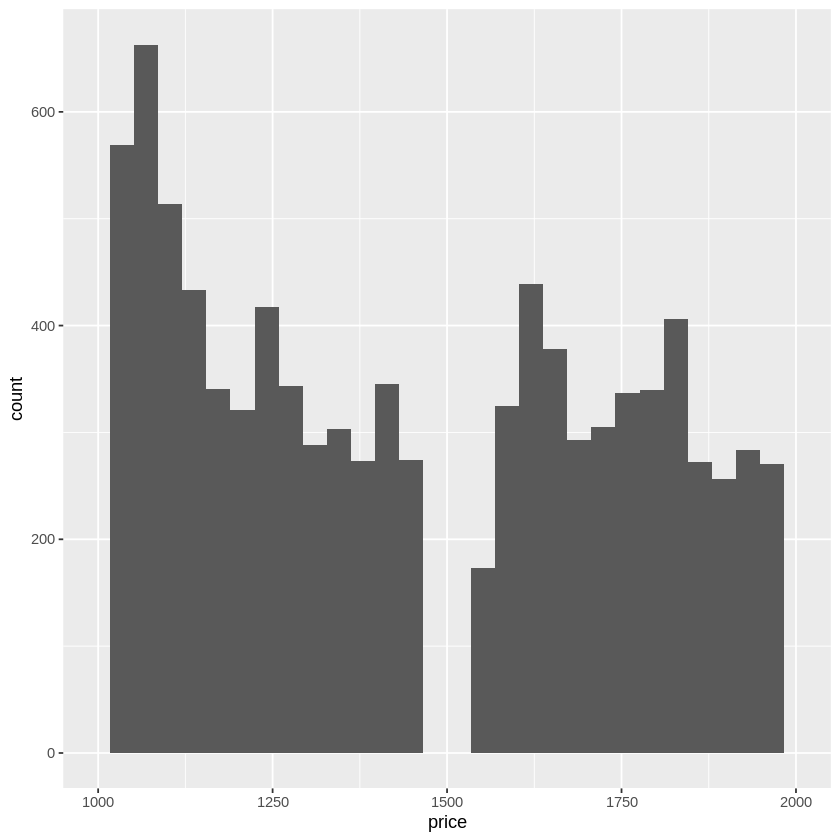

In [20]:
ggplot(diamonds, aes(x = price)) + 
  geom_histogram() +
  coord_cartesian(xlim = c(1000, 2000))

ggplot(diamonds, aes(x = price)) + 
  geom_histogram() +
  xlim(1000, 2000)

xlim() sets the bins as 30 for that section of the plot while coord_cartesian() has 30 for the whole plot, then zooms in. You can only have a partial bar when using coord_cartesian().

## [10.4.1 Exercises](https://r4ds.hadley.nz/eda#exercises-1)

1. What happens to missing values in a histogram? What happens to missing values in a bar chart? Why is there a difference in how missing values are handled in histograms and bar charts?

The missing values in a histogram are ignored and left out. In a bar chart, they are considered their own category. This is because a histogram has continuous variables while bar charts typically have categorical variables.

2. What does na.rm = TRUE do in mean() and sum()?

It removes all NA values from being observed in the calculation.

3. Recreate the frequency plot of scheduled_dep_time colored by whether the flight was cancelled or not. Also facet by the cancelled variable. Experiment with different values of the scales variable in the faceting function to mitigate the effect of more non-cancelled flights than cancelled flights.

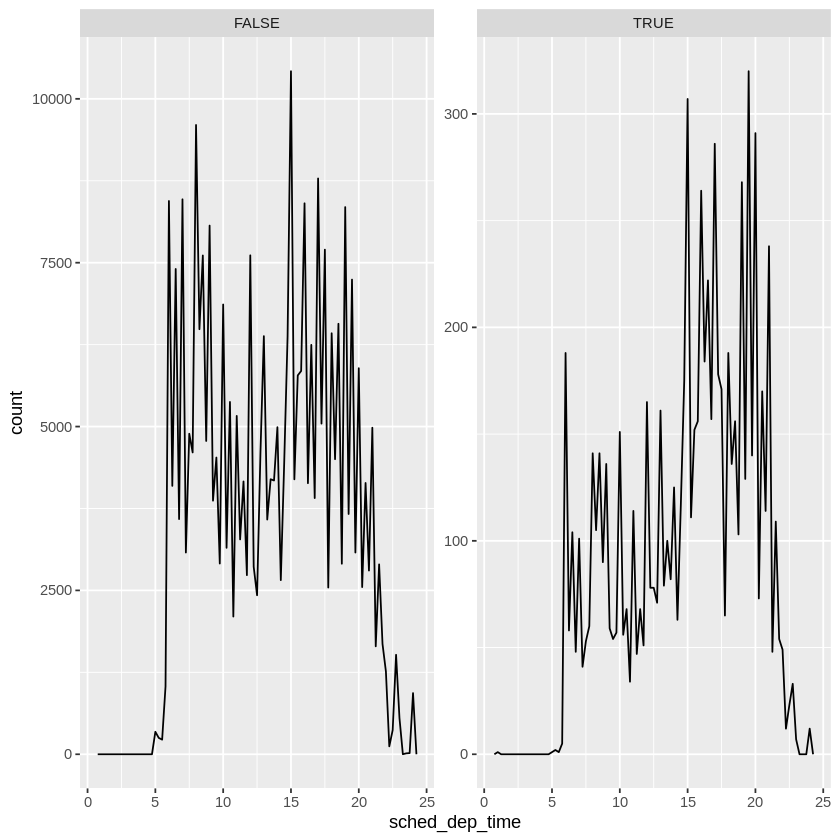

In [24]:
nycflights13::flights |> 
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + (sched_min / 60)
  ) |> 
  ggplot(aes(x = sched_dep_time)) + 
  geom_freqpoly(binwidth = 1/4) +
  facet_wrap(~cancelled, scales = "free_y")

## [11.2.1 Exercises](https://r4ds.hadley.nz/communication#exercises)

1. Create one plot on the fuel economy data with customized title, subtitle, caption, x, y, and color labels.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


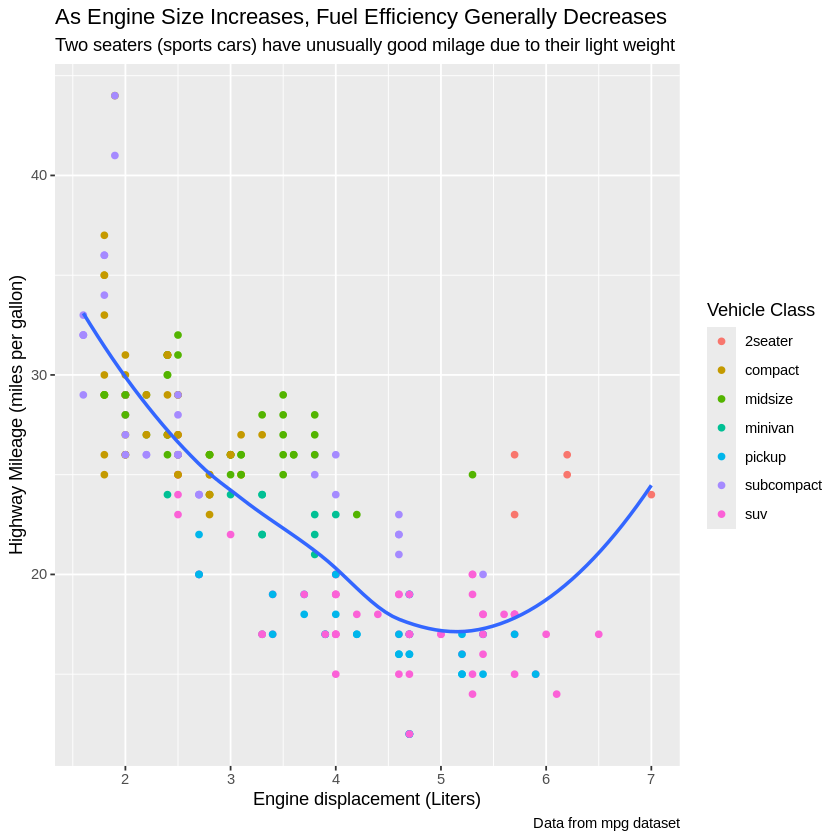

In [44]:
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(
    x = "Engine displacement (Liters)",
    y = "Highway Mileage (miles per gallon)",
    color = "Vehicle Class",
    title = "As Engine Size Increases, Fuel Efficiency Generally Decreases",
    subtitle = "Two seaters (sports cars) have unusually good milage due to their light weight",
    caption = "Data from mpg dataset"
  )

2. Recreate the following plot using the fuel economy data. Note that both the colors and shapes of points vary by type of drive train.  
<img src="https://r4ds.hadley.nz/communication_files/figure-html/unnamed-chunk-5-1.png" width="400" height="300"/></img>

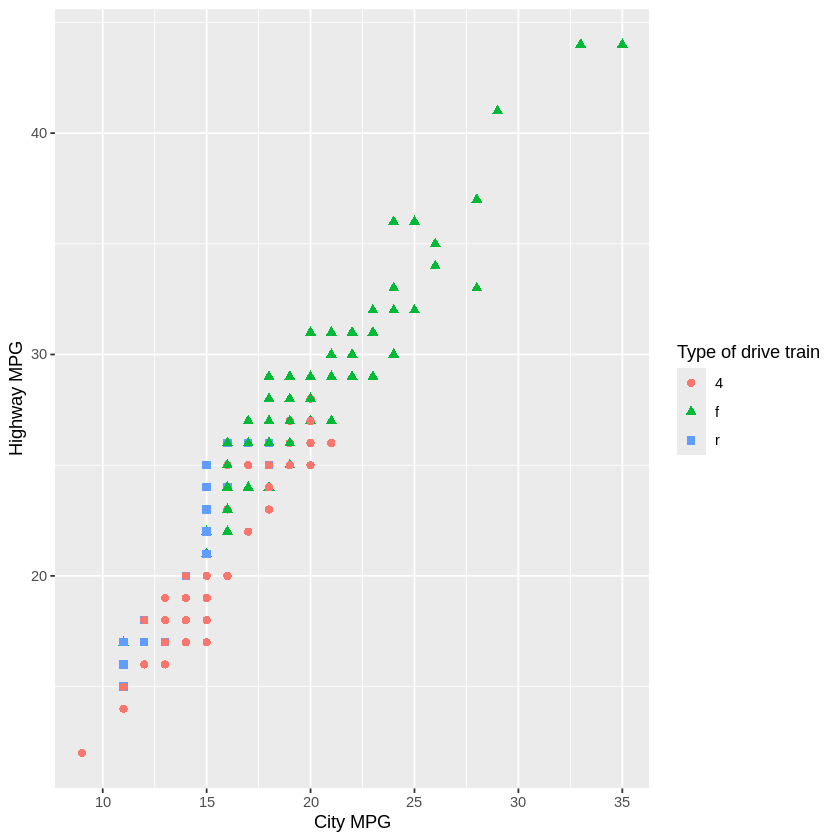

In [48]:
ggplot(mpg, aes(x = cty, y = hwy)) +
  geom_point(aes(color = drv, shape = drv), size = 2) +
  labs(
    x = "City MPG",
    y = "Highway MPG",
    color = "Type of drive train",
    shape = "Type of drive train"
  )

3. Take an exploratory graphic that you’ve created in the last month, and add informative titles to make it easier for others to understand.

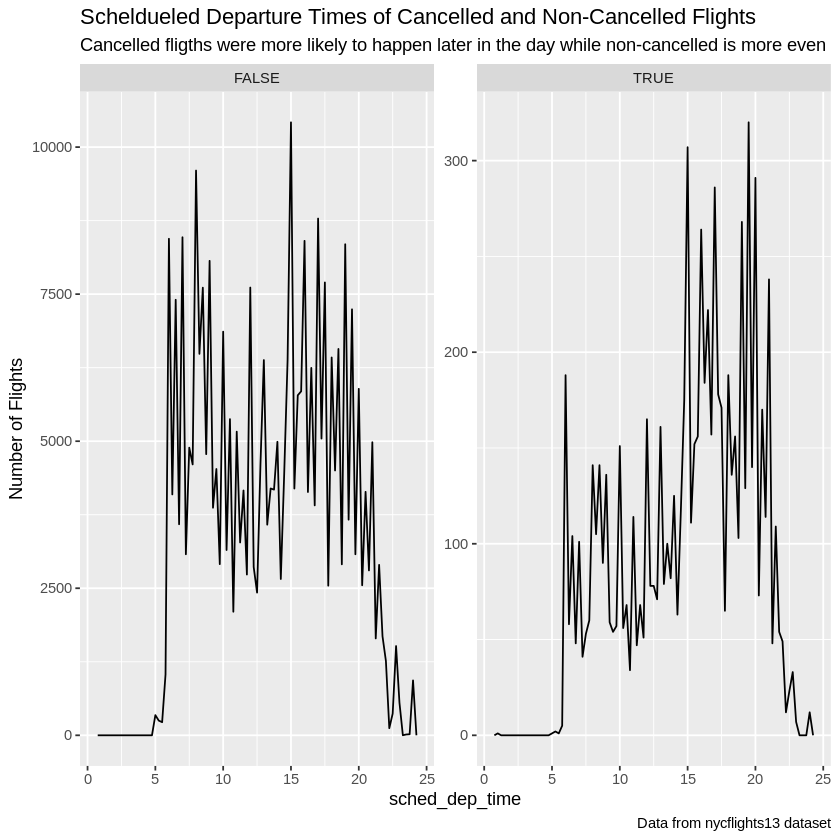

In [53]:
nycflights13::flights |> 
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + (sched_min / 60)
  ) |> 
  ggplot(aes(x = sched_dep_time)) + 
  geom_freqpoly(binwidth = 1/4) +
  facet_wrap(~cancelled, scales = "free_y") +
  labs(
    title = "Scheldueled Departure Times of Cancelled and Non-Cancelled Flights",
    subtitle = "Cancelled fligths were more likely to happen later in the day while non-cancelled is more even",
    caption = "Data from nycflights13 dataset",
    y = "Number of Flights"
  )

## [11.3.1 Exercises](https://r4ds.hadley.nz/communication#exercises-1)

1. Use geom_text() with infinite positions to place text at the four corners of the plot.

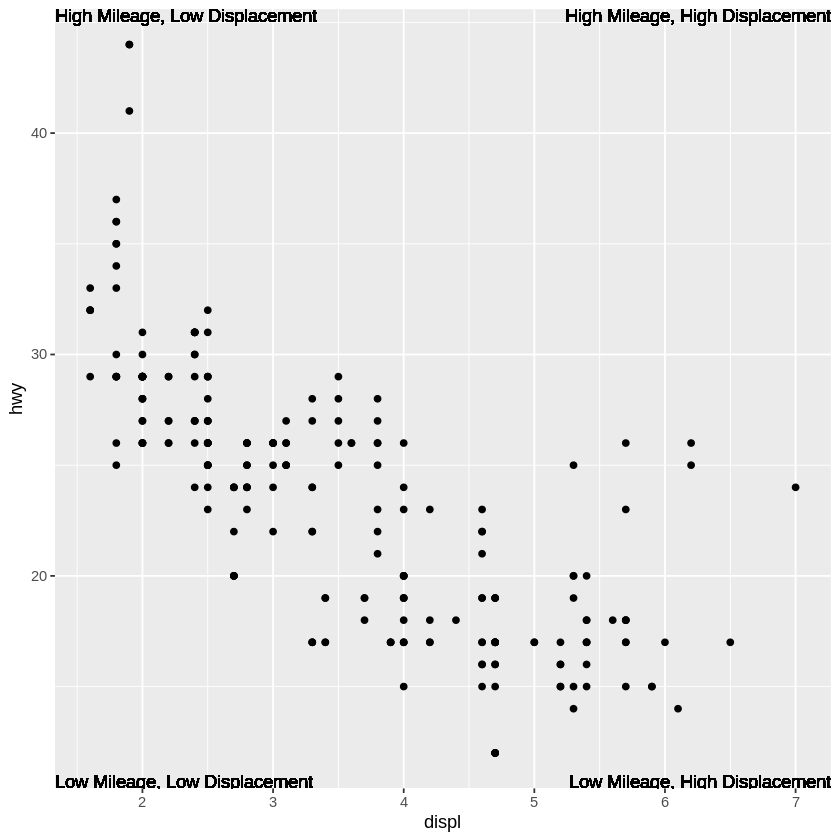

In [58]:
plot <- ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  geom_text(
    label = "High Mileage, Low Displacement",
    x = -Inf,
    y = Inf,
    hjust = 0,
    vjust = 1
  ) +
  geom_text(
    label = "High Mileage, High Displacement",
    x = Inf,
    y = Inf,
    hjust = 1,
    vjust = 1
  ) +
  geom_text(
    label = "Low Mileage, Low Displacement",
    x = -Inf,
    y = -Inf,
    hjust = 0,
    vjust = 0
  ) +
  geom_text(
    label = "Low Mileage, High Displacement",
    x = Inf,
    y = -Inf,
    hjust = 1,
    vjust = 0
  )
plot

2. Use annotate() to add a point geom in the middle of your last plot without having to create a tibble. Customize the shape, size, or color of the point.

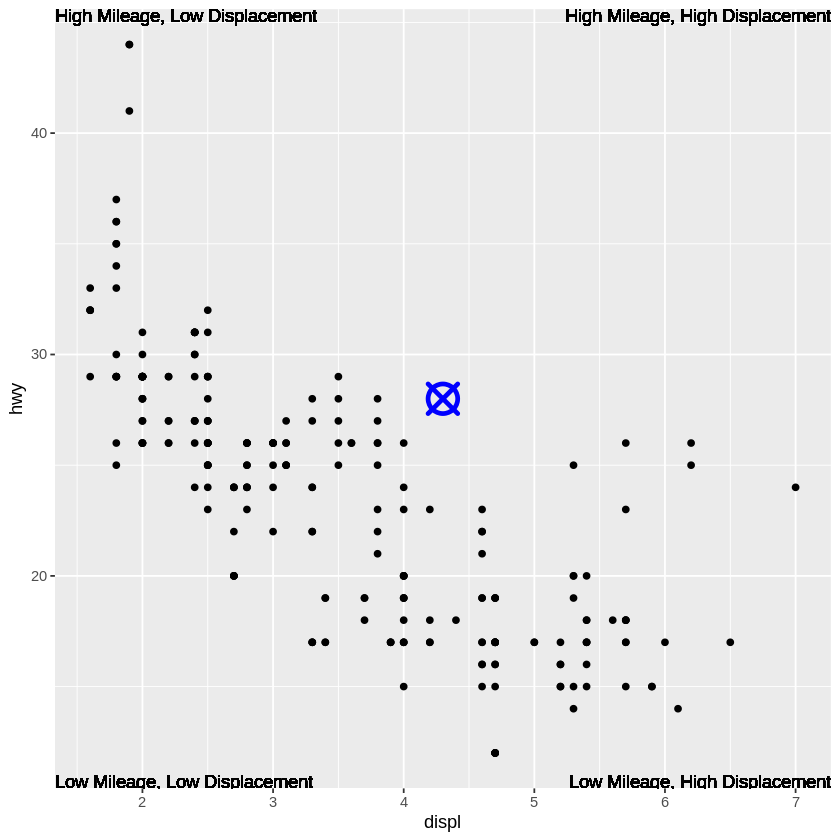

In [65]:
x_mid = (min(mpg$displ) + max(mpg$displ))/2
y_mid = (min(mpg$hwy) + max(mpg$hwy))/2

plot +
    annotate(
        geom = "point",
        x = x_mid,
        y = y_mid,
        shape = 13,
        size = 7,
        color = "blue",
        stroke = 2
    )

3. How do labels with geom_text() interact with faceting? How can you add a label to a single facet? How can you put a different label in each facet? (Hint: Think about the dataset that is being passed to geom_text().)

It adds a label for each subplot. You can add a label to a single facet by creating a new dataframe that only has the information needed for the label, whith everything else being NAs. You can also create a new dataframe to have a different label in each facet.

4. What arguments to geom_label() control the appearance of the background box?

The fill argument controls the background color.

5. What are the four arguments to arrow()? How do they work? Create a series of plots that demonstrate the most important options.

The four arguments are:  
angle - angle of arrowhead in degrees  
length - length of arrowhead from tip to base  
ends - determines which end of line segment arrowhead should appear on  
type - indicate whether arrohead should be a closed triangle

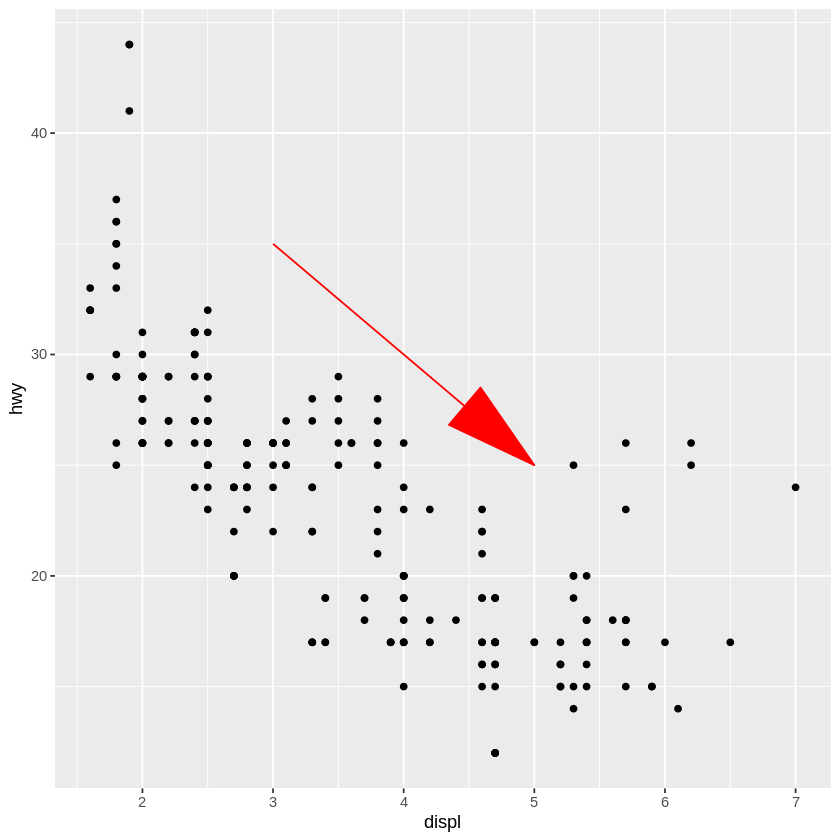

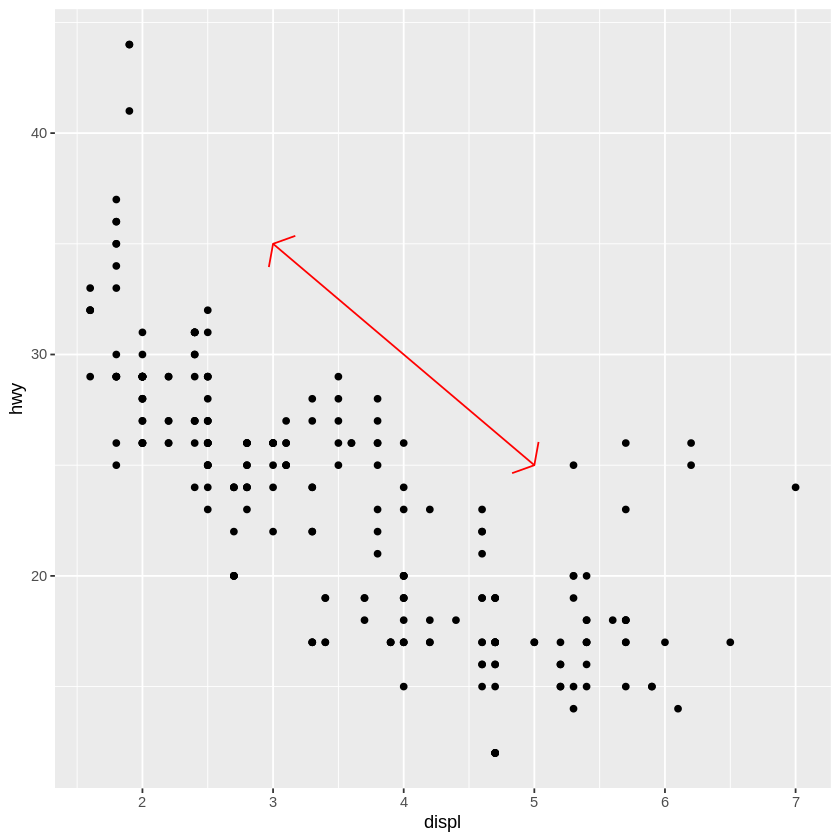

In [78]:
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  annotate(
    geom = "segment",
    x = 3, y = 35, xend = 5, yend = 25, color = "red",
    arrow = arrow(angle = 15, length = unit(2, "cm"), ends = "last", type = "closed")
  )

ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  annotate(
    geom = "segment",
    x = 3, y = 35, xend = 5, yend = 25, color = "red",
    arrow = arrow(angle = 60, length = unit(0.5, "cm"), ends = "both", type = "open")
  )

## [11.4.6 Exercises](https://r4ds.hadley.nz/communication#exercises-2)

1. Why doesn’t the following code override the default scale?
```r
df <- tibble(
  x = rnorm(10000),
  y = rnorm(10000)
)

ggplot(df, aes(x, y)) +
  geom_hex() +
  scale_color_gradient(low = "white", high = "red") +
  coord_fixed()
```

2. What is the first argument to every scale? How does it compare to labs()?

3. Change the display of the presidential terms by:

    a.Combining the two variants that customize colors and x axis breaks.  
    b.Improving the display of the y axis.  
    c.Labelling each term with the name of the president.  
    d.Adding informative plot labels.  
    e.Placing breaks every 4 years (this is trickier than it seems!).  

4. First, create the following plot. Then, modify the code using override.aes to make the legend easier to see.
```r
ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point(aes(color = cut), alpha = 1/20)
```

## [11.5.1 Exercises](https://r4ds.hadley.nz/communication#exercises-3)

1. Pick a theme offered by the ggthemes package and apply it to the last plot you made.

2. Make the axis labels of your plot blue and bolded.